In [26]:
import matplotlib.pyplot as plt
import numpy as np


### 绘制MaScQA数据集上各模型的得分情况

In [ ]:
# 数据
models = ['GPT-4', 'GPT-4-COT', 'Qwen2.5-72B', 'TopoChat(w/o KG)']
scores = [61.54, 62.15, 55.54, 68.62]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


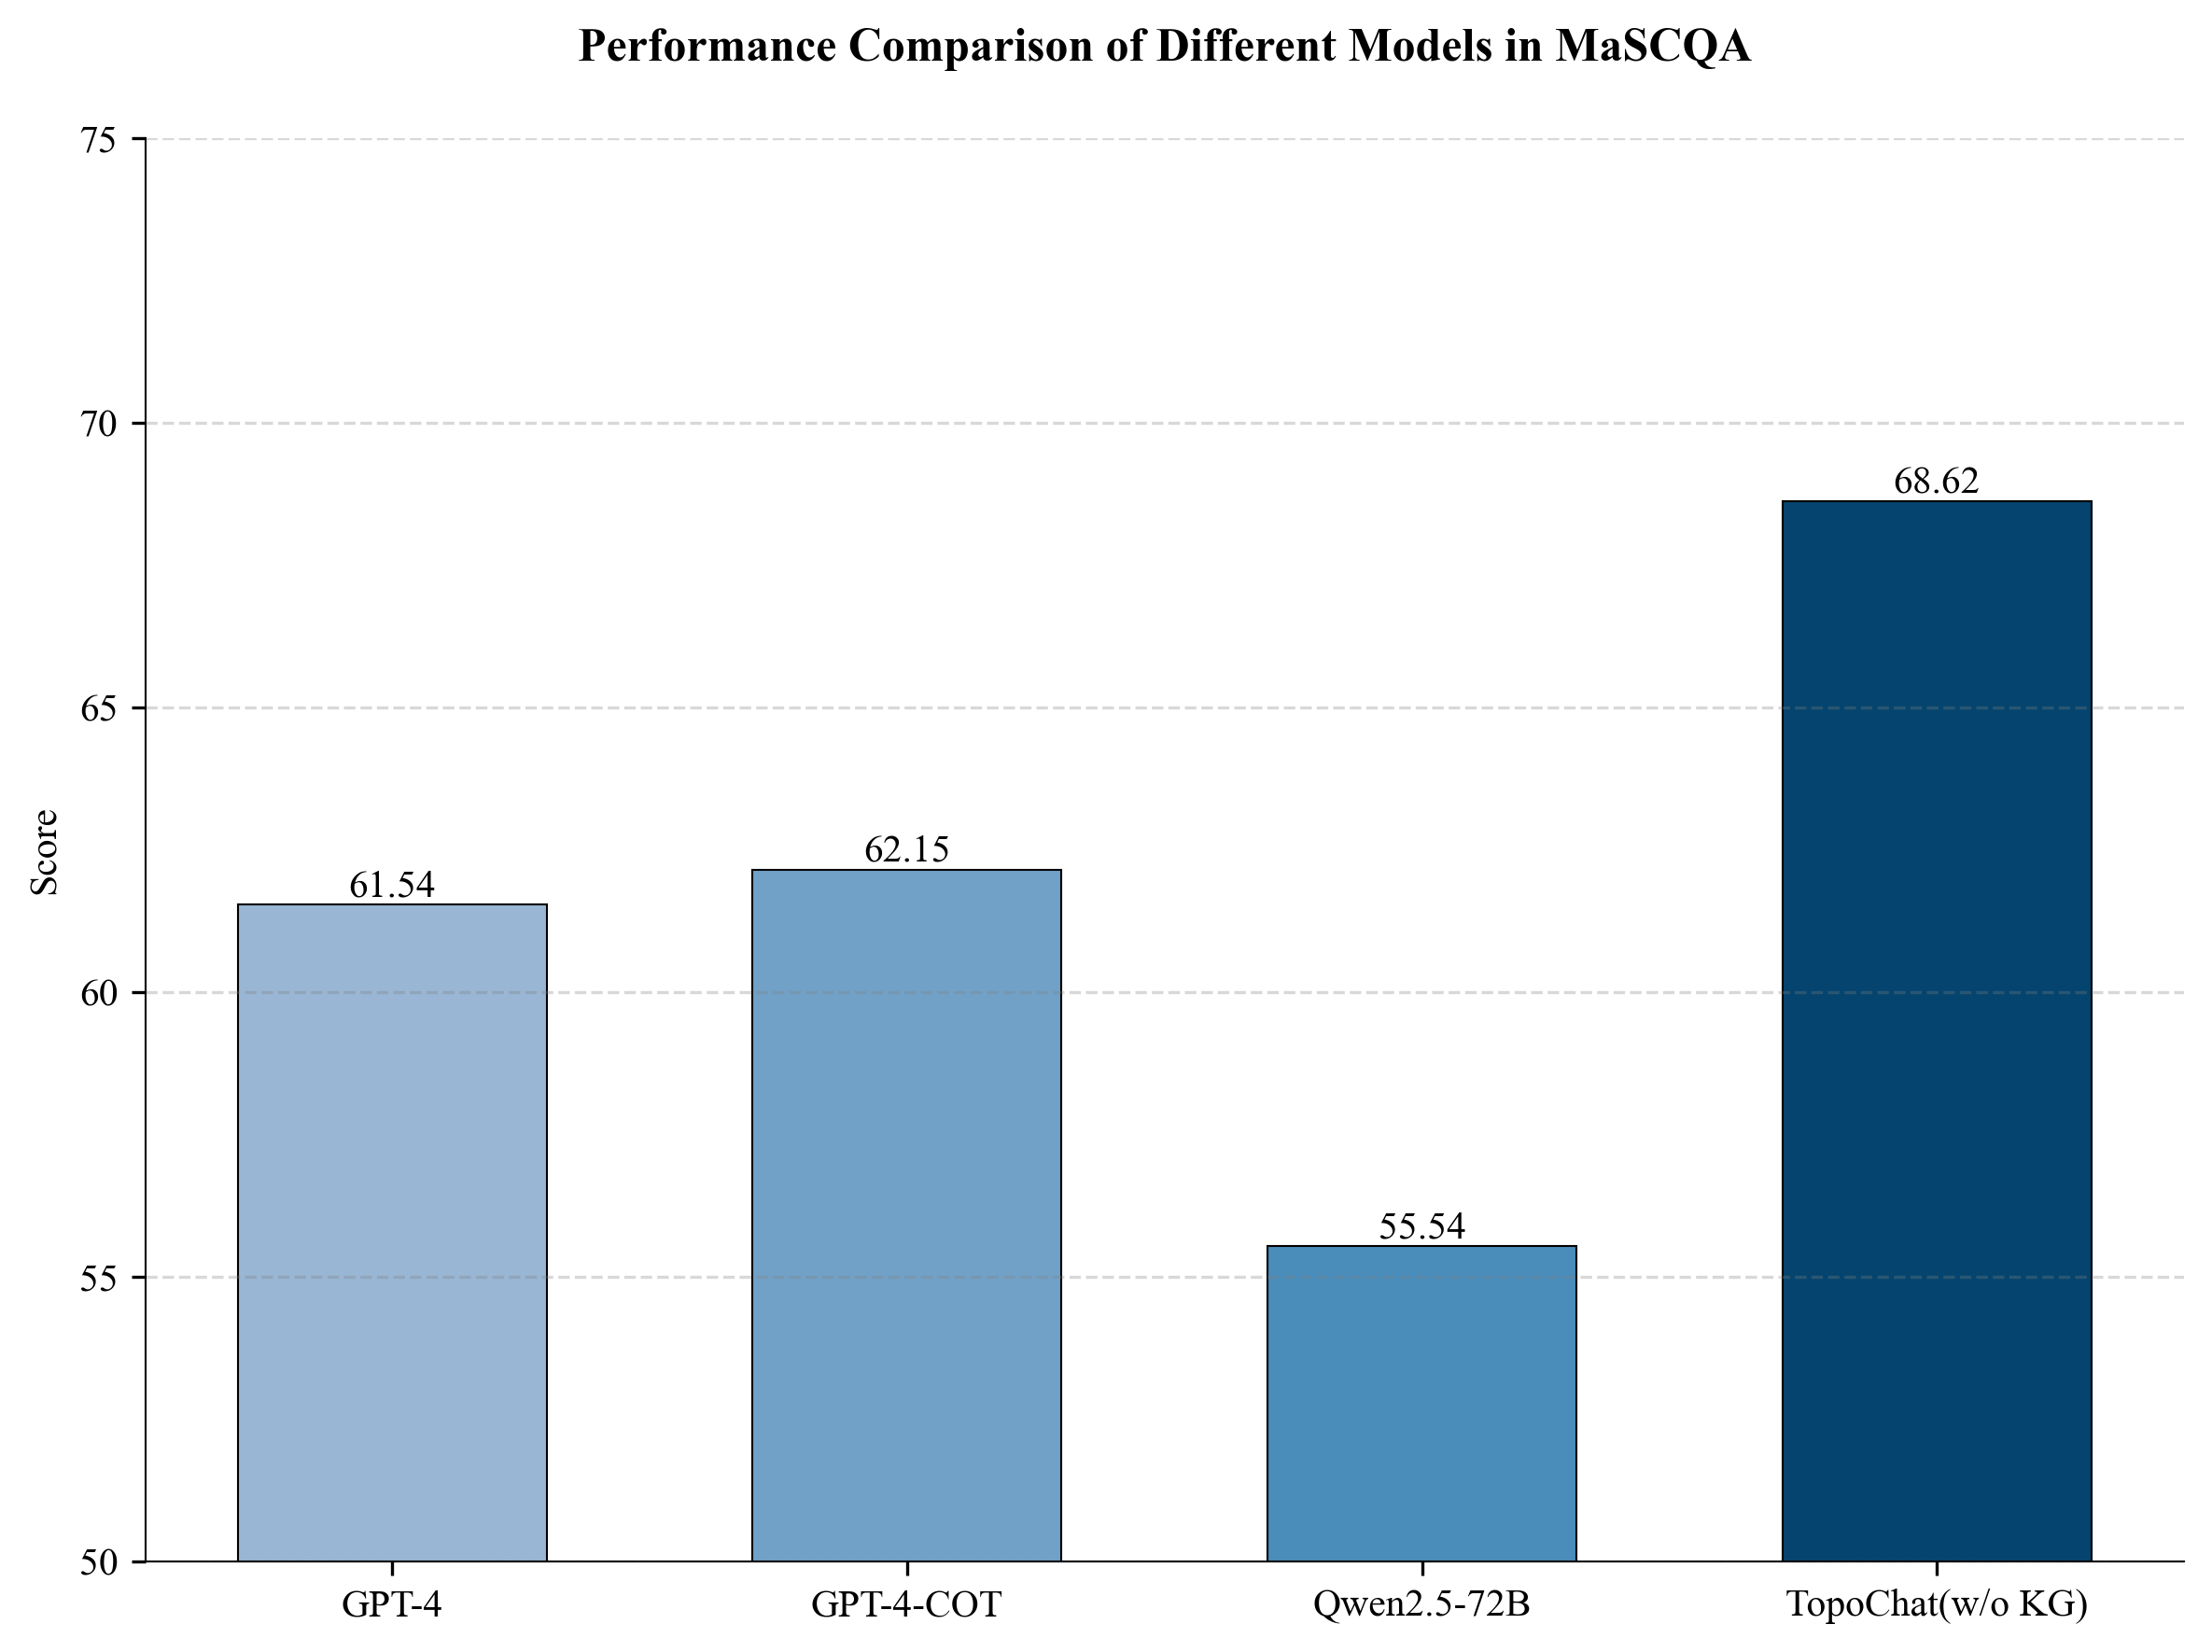

In [14]:
# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 创建专业的配色方案（不同深度的蓝灰色）
colors = ['#99b6d4', '#72a1c7', '#4a8cba', '#05446e']

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 绘制柱状图
bars = ax.bar(models, scores, width=0.6, 
              color=colors,
              edgecolor='black', linewidth=0.5)

# 设置y轴范围
ax.set_ylim(50, 75)

# 添加网格线（使用更浅的颜色）
ax.grid(True, linestyle='--', alpha=0.3, axis='y', color='gray')

# 在柱子上方添加数值标签
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=10)

# 设置标题和标签
ax.set_title('Performance Comparison of Different Models in MaSCQA', 
             pad=20, fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=10)

# 设置轴刻度标签的字体大小
ax.tick_params(axis='both', labelsize=10)

# 移除顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 加深左侧和底部边框
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# 调整布局
plt.tight_layout()
plt.savefig('figures/model_comparison_mascqa.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/model_comparison_mascqa.eps', format='eps', bbox_inches='tight')
plt.show()


### 绘制TopoQA数据集上各模型的得分情况

In [27]:
# 数据
models = ['LLaMA3.1-70B', 'Qwen2.5-72B', 'TopoChat\n(w/o literature)']
scores = [14.50, 14.00, 65.00]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


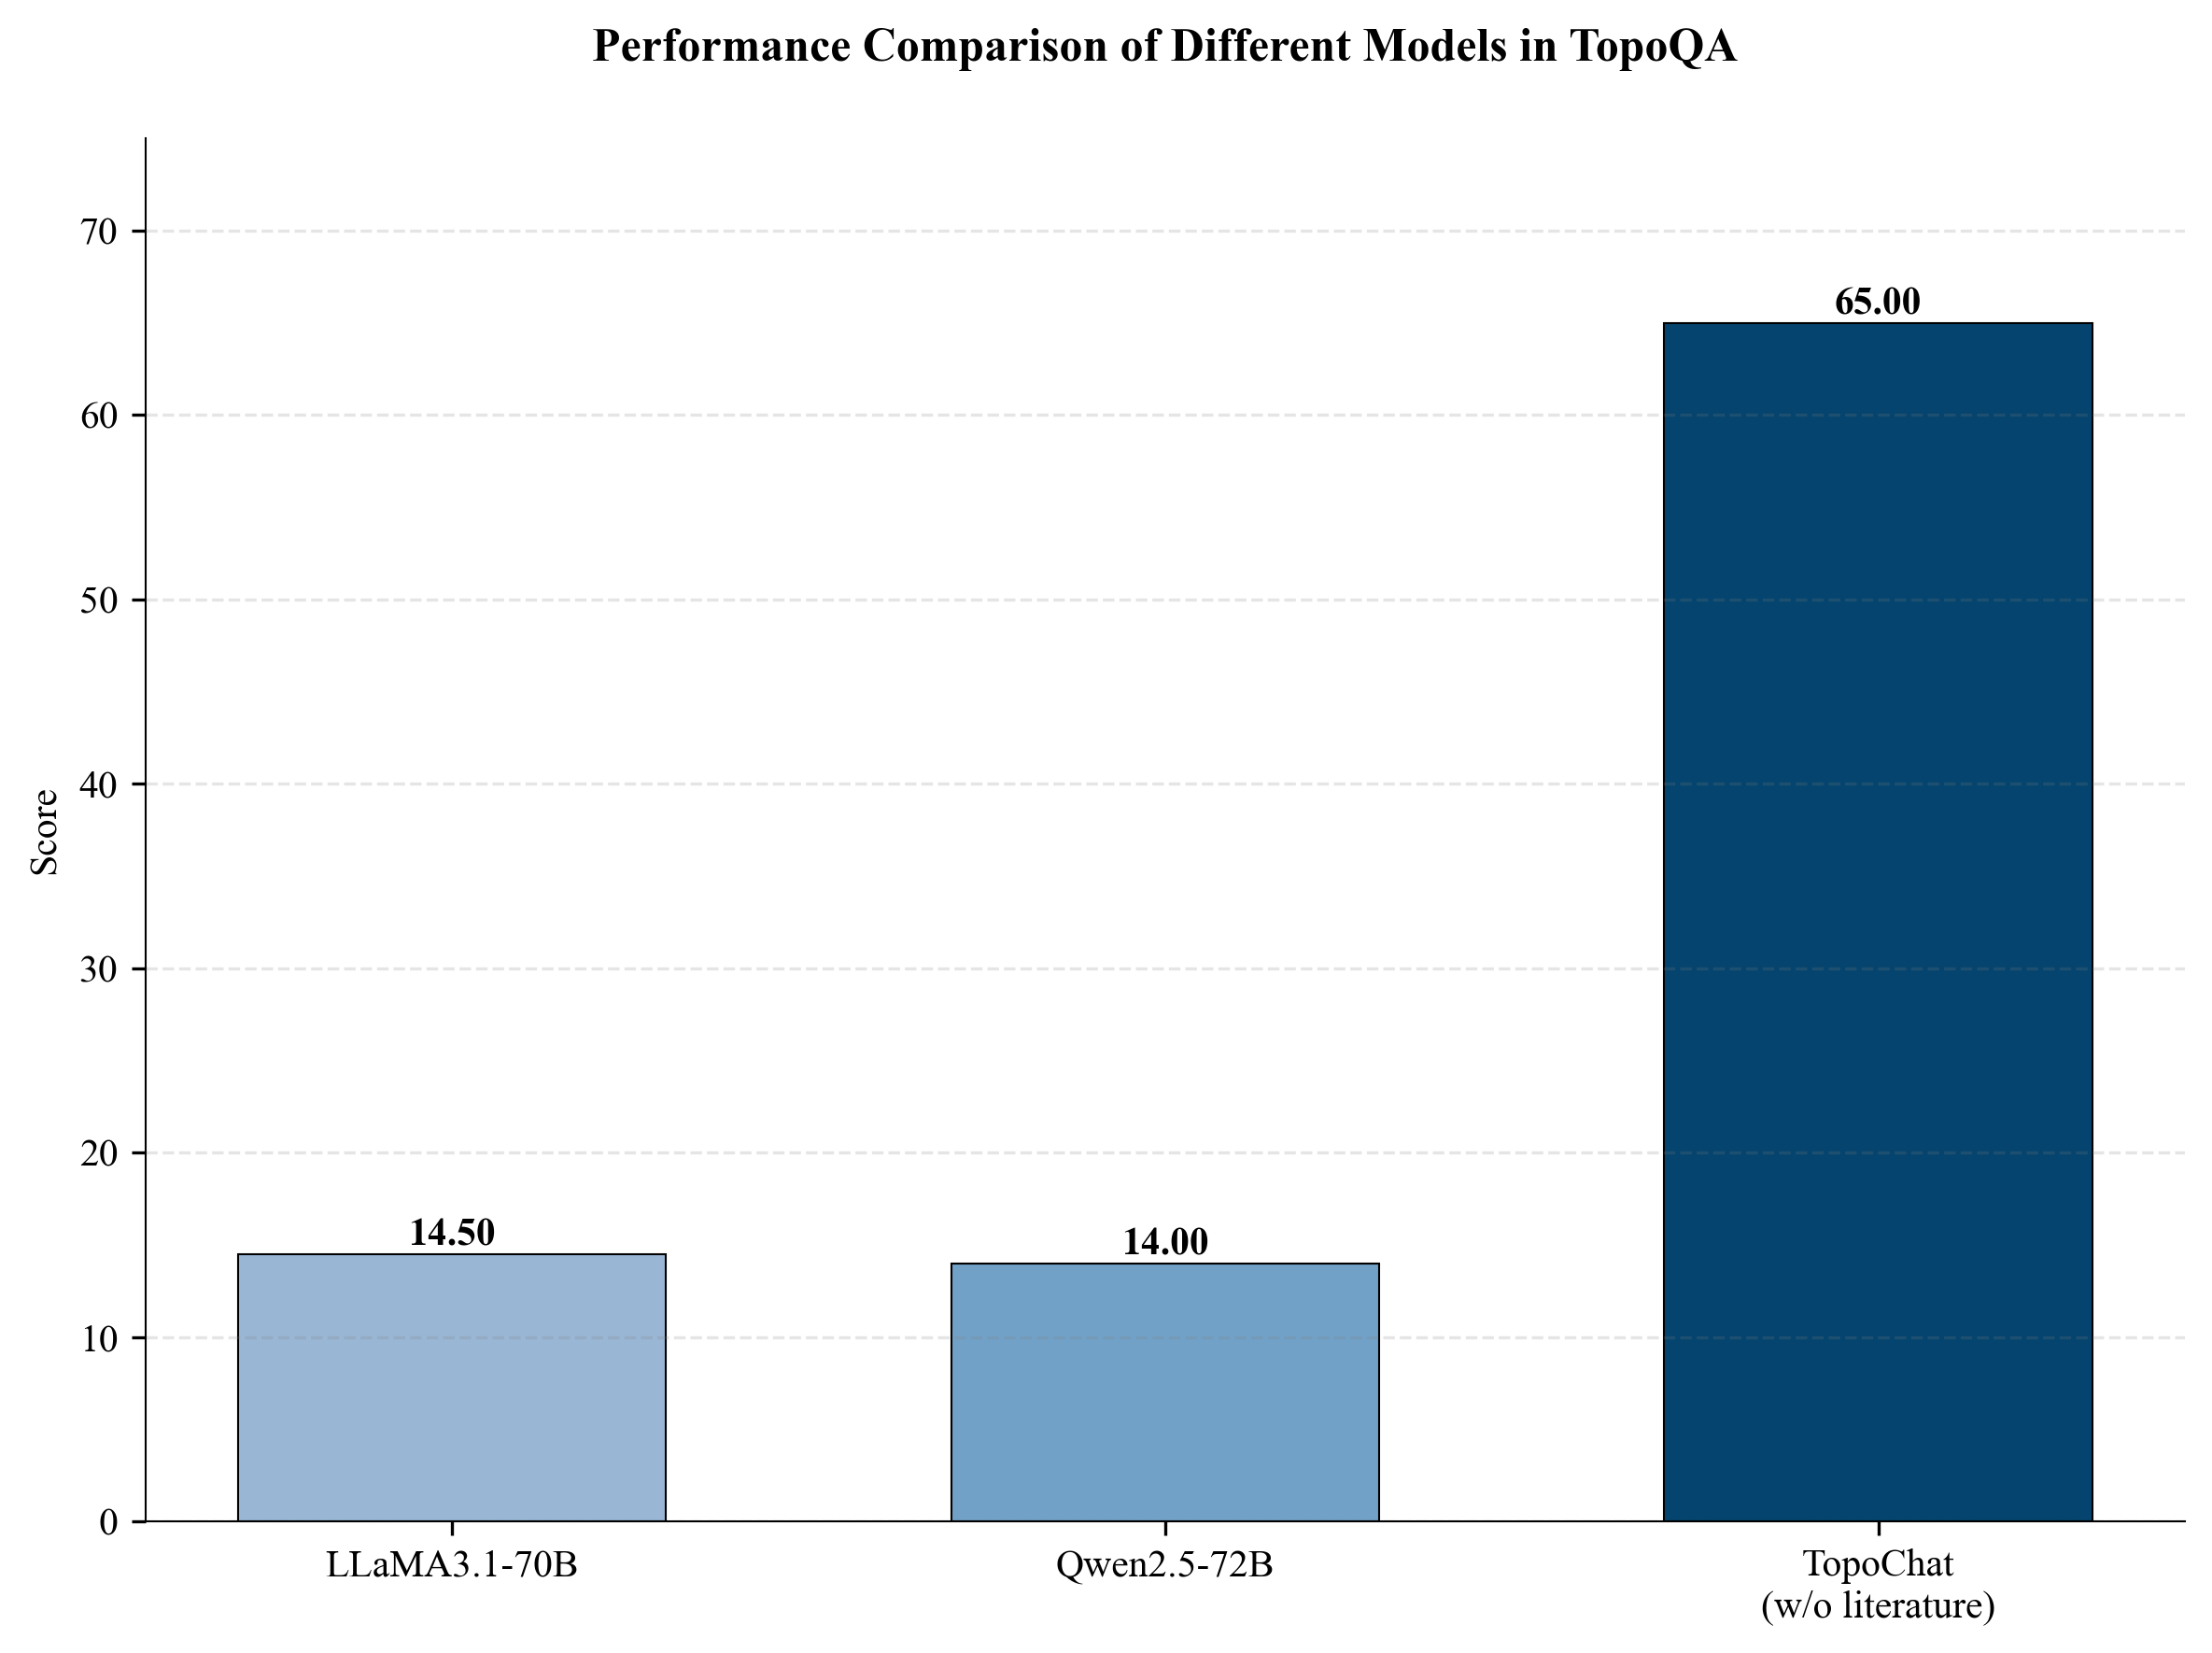

In [28]:
# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 创建配色方案：前两个相近色，TopoChat使用突出的深色
colors = ['#99b6d4', '#72a1c7', '#05446e']

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# 绘制柱状图
bars = ax.bar(models, scores, width=0.6, 
              color=colors,
              edgecolor='black', linewidth=0.5)

# 设置y轴范围，考虑到数据分布特点
ax.set_ylim(0, 75)  # 从0开始以显示完整对比差异

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.2, axis='y', color='gray')

# 在柱子上方添加数值标签
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

# 设置标题和标签
ax.set_title('Performance Comparison of Different Models in TopoQA', 
             pad=20, fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=10)

# 设置轴刻度标签的字体大小
ax.tick_params(axis='both', labelsize=10)

# 移除顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 加深左侧和底部边框
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# 背景色设置
# ax.set_facecolor('#f8f8f8')
fig.patch.set_facecolor('white')

# 调整布局
plt.tight_layout()

plt.savefig('figures/model_comparison_topoqa.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/model_comparison_topoqa.eps', format='eps', bbox_inches='tight')
plt.show()

# 显示图表
plt.show()

### 绘制TopoChat随机选择文献和使用聚类方法的效果对比图

In [18]:
# 数据
topics = ['Thermodynamics', 'Atomic structure', 'Mechanical behavior', 
          'Material manufacturing', 'Material applications', 'Phase transition',
          'Electrical properties', 'Material processing', 'Transport phenomena',
          'Magnetic properties', 'Material characterization', 'Fluid mechanics',
          'Material testing', 'Miscellaneous', 'MaScQA']

questions = [114, 100, 96, 91, 53, 41, 36, 35, 24, 15, 14, 14, 9, 8, 650]
random_scores = [44.74, 52.00, 42.71, 72.53, 77.36, 63.41, 33.33, 71.43, 
                45.83, 60.00, 85.71, 50.00, 100.00, 62.50, 56.46]
cluster_scores = [60.53, 62.00, 58.33, 73.63, 90.57, 73.17, 63.89, 82.86,
                54.17, 80.00, 100.00, 50.00, 100.00, 87.50, 68.62]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


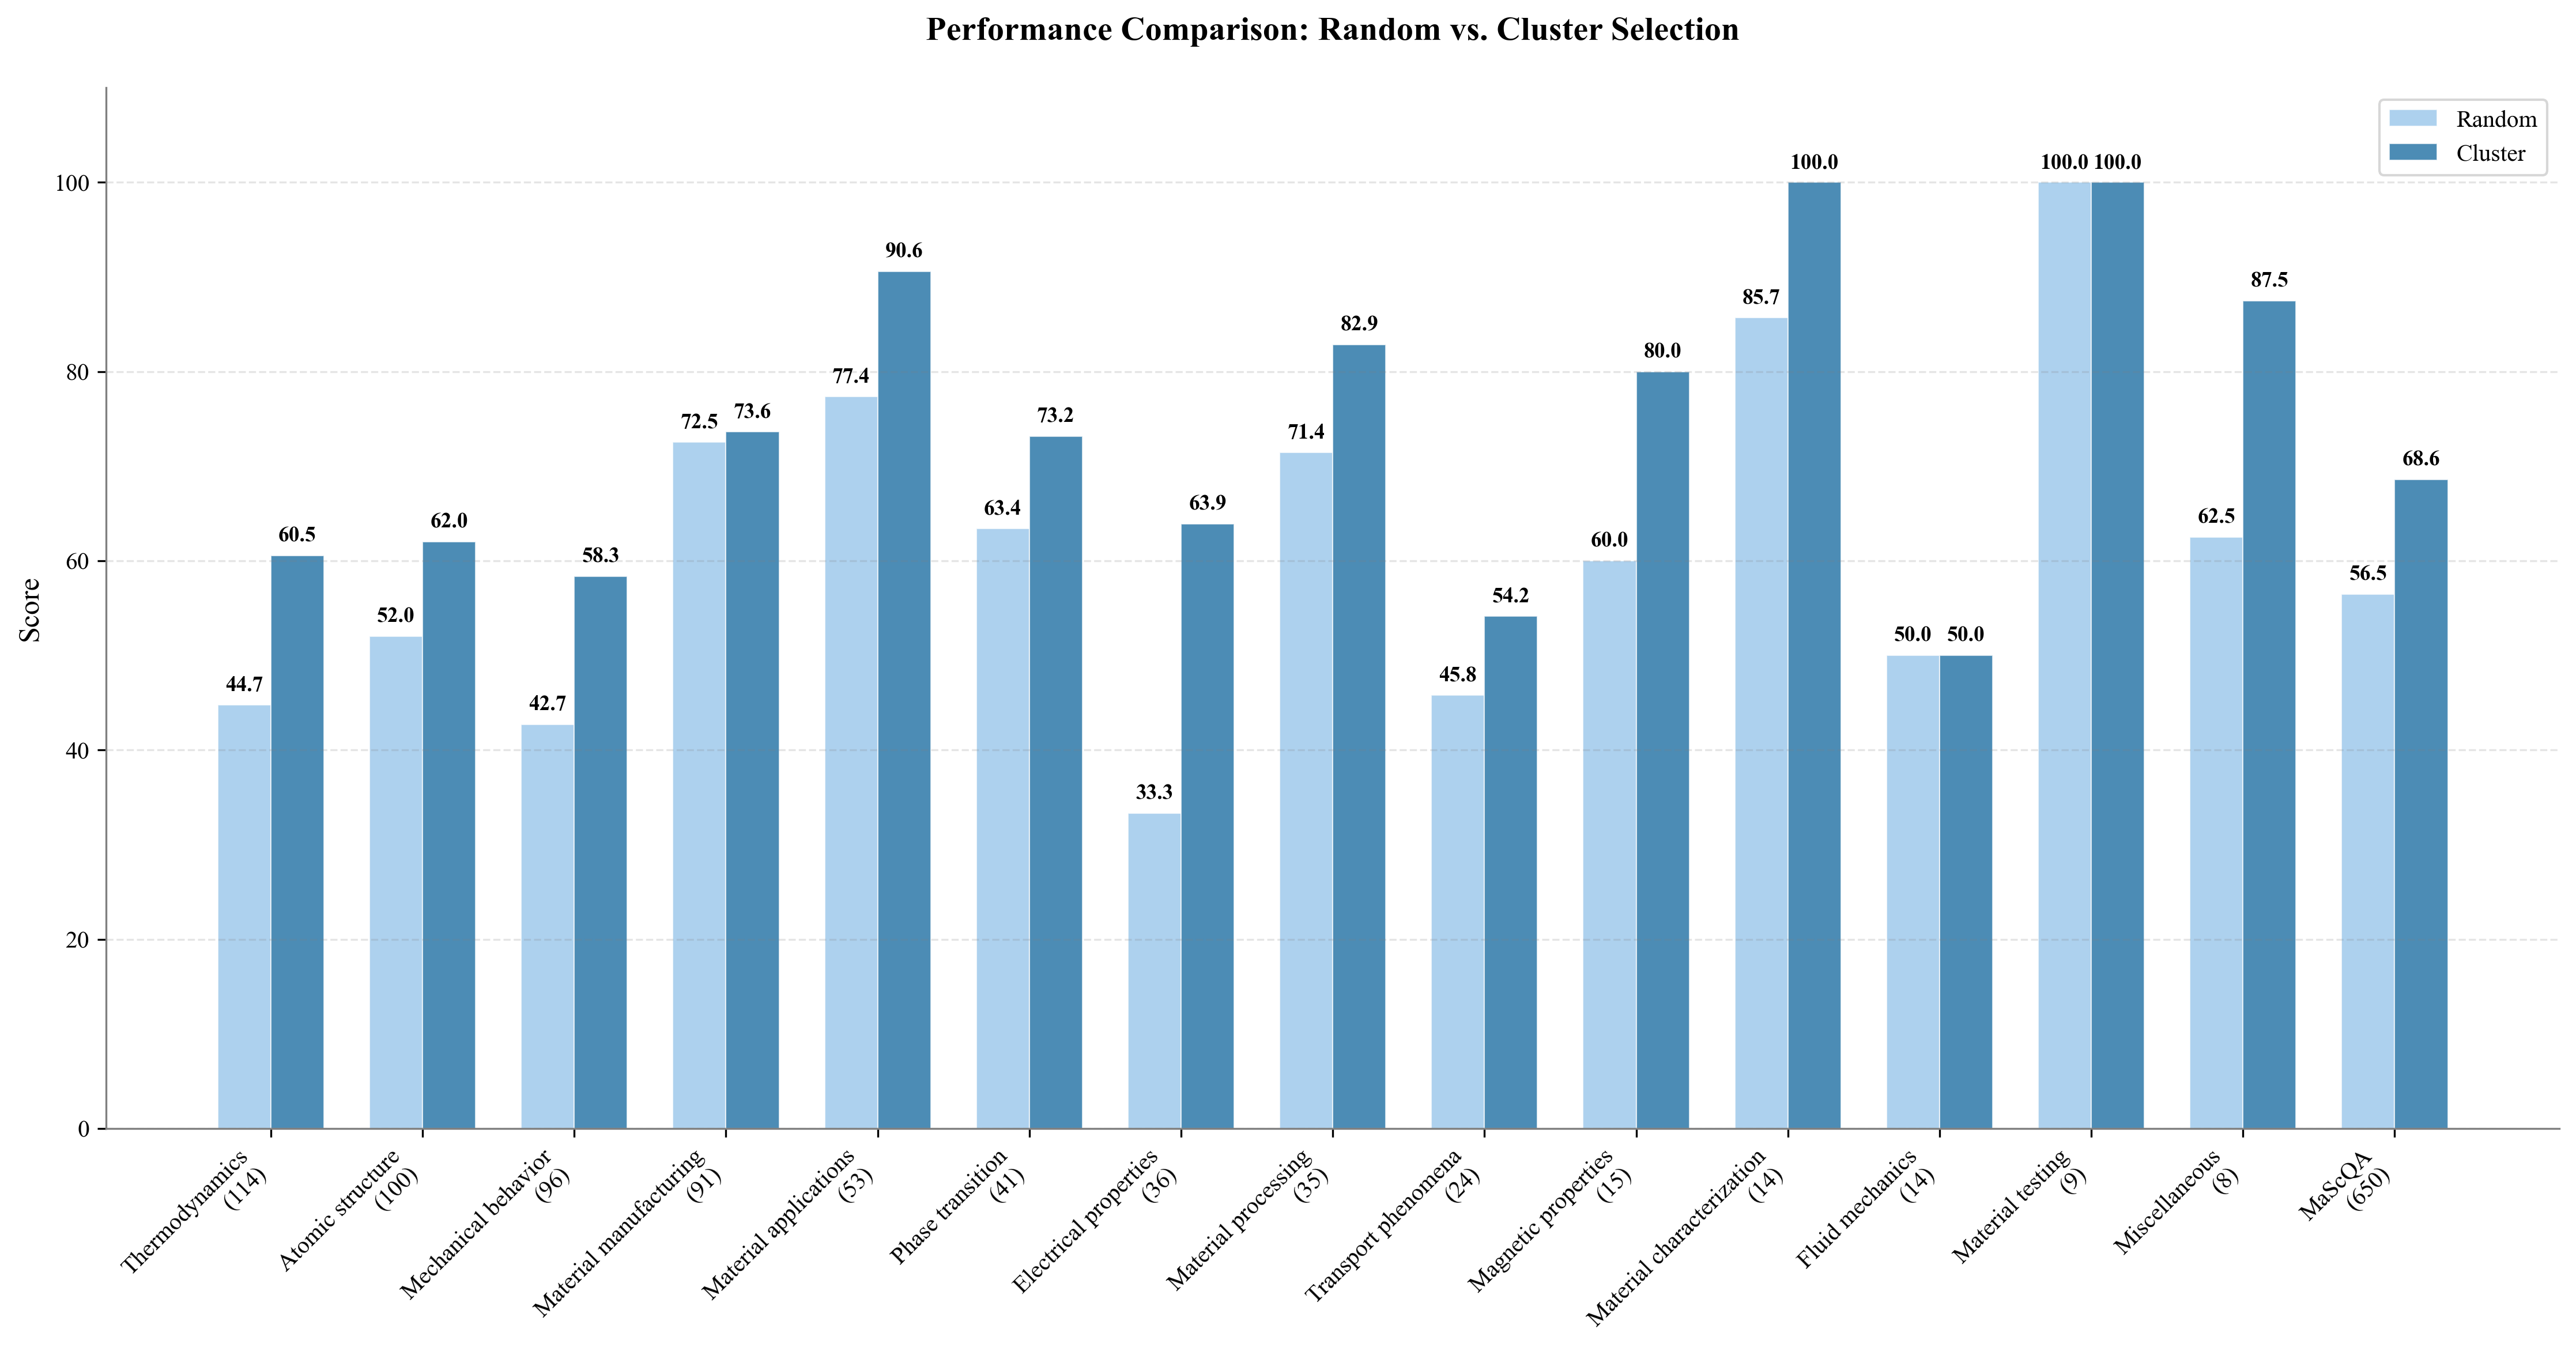

In [25]:
# 创建带问题数量的x轴标签
topics_with_counts = [f'{topic}\n({count})' for topic, count in zip(topics, questions)]

# 创建图形
plt.figure(figsize=(15, 8), dpi=300, facecolor='white')

# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'

# 计算x轴位置
x = np.arange(len(topics))
width = 0.35

# 设置颜色
random_color = '#8BBEE8'
cluster_color = '#005B96'

# 绘制条形图
plt.bar(x - width/2, random_scores, width, color=random_color, alpha=0.7,
        label='Random', edgecolor='white', linewidth=0.5)
plt.bar(x + width/2, cluster_scores, width, color=cluster_color, alpha=0.7,
        label='Cluster', edgecolor='white', linewidth=0.5)

# 添加数据标签
def add_labels(x_pos, scores):
    for i, v in enumerate(scores):
        plt.text(x_pos[i], v + 1, f'{v:.1f}', 
                ha='center', va='bottom', 
                fontsize=9, fontweight='bold')

add_labels(x - width/2, random_scores)
add_labels(x + width/2, cluster_scores)

# 自定义x轴标签
plt.xticks(x, topics_with_counts, rotation=45, ha='right')

# 设置标题和标签
plt.title('Performance Comparison: Random vs. Cluster Selection', 
         pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)

# 添加图例
legend = plt.legend(loc='upper right', frameon=True, framealpha=0.9)
legend.get_frame().set_edgecolor('lightgray')

# 设置y轴范围
plt.ylim(0, 110)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.2, axis='y', color='gray')

# 设置背景色
# plt.gca().set_facecolor('#f8f8f8')

# 移除顶部和右侧边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('figures/cluster_comparison_mascqa.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/cluster_comparison_mascqa.eps', format='eps', bbox_inches='tight')

# 显示图表
plt.show()

### 绘制不同Topic下多个模型的得分雷达图

In [ ]:
# 数据准备
topics = ['Thermodynamics', 'Atomic structure', 'Mechanical behavior',
          'Material manufacturing', 'Material applications', 'Phase transition',
          'Electrical properties', 'Material processing', 'Transport phenomena',
          'Magnetic properties', 'Material characterization', 'Fluid mechanics',
          'Material testing', 'Miscellaneous']

values = {
    'GPT-4': [57.02, 56, 45.83, 63.74, 88.68, 65.85, 50, 74.29, 62.5, 53.33, 85.71, 64.29, 100, 75],
    'GPT-4-COT': [57.02, 59, 42.71, 68.13, 86.79, 60.98, 41.67, 88.57, 62.5, 60, 71.43, 85.71, 100, 62.5],
    'Qwen2.5-72b': [39.47, 50, 38.54, 70.33, 84.91, 68.29, 38.89, 77.14, 41.67, 53.33, 85.71, 50, 100, 62.5],
    'TopoChat': [60.53, 62, 58.33, 73.63, 90.57, 73.17, 63.89, 82.86, 54.17, 80, 100, 50, 100, 87.5]
}


In [ ]:

# 设置画布
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')

# 角度设置
angles = np.linspace(0, 2*np.pi, len(topics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # 闭合图形

# 绘制每个模型的数据
colors = ['#FF6384', '#36A2EB', '#4BC0C0', '#9966FF']
for model, color in zip(values.keys(), colors):
    values_model = values[model]
    values_model = np.concatenate((values_model, [values_model[0]]))  # 闭合数据
    ax.plot(angles, values_model, 'o-', linewidth=2, label=model, color=color)
    ax.fill(angles, values_model, alpha=0.25, color=color)

# 设置刻度标签
ax.set_xticks(angles[:-1])

# 调整标签位置
ax.set_xticklabels(topics, fontsize=10)
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    if angle > np.pi/2 and angle < 3*np.pi/2:
        label.set_rotation(angle * 180/np.pi + 180)
        label.set_ha('right')
    else:
        label.set_rotation(angle * 180/np.pi)
        label.set_ha('left')
    label.set_va('center')

# 设置范围和网格
ax.set_ylim(0, 100)
ax.grid(True)

# 添加图例 - 移动到左下角
plt.legend(loc='lower left', bbox_to_anchor=(-0.2, -0.2))

# 设置标题
plt.title("Model Performance Comparison Across Topics", pad=40, fontsize=20)

# 保存图片，确保图例不被裁剪
plt.savefig('figures/radar_chart.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/radar_chart.eps', format='eps', bbox_inches='tight')

plt.show()
